In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.read_parquet("data/cnb_vyber.parquet")

In [6]:
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))

In [7]:
df = df[df['rok'].notnull()]

In [8]:
df.columns

Index(['008', '020_a', '020_c', '020_q', '041_a', '041_h', '041_ind1', '044_a',
       '072_a', '072_x', '080_a', '100_4', '100_7', '100_a', '100_d', '240_l',
       '245_a', '245_c', '245_n', '245_p', '246_a', '250_a', '250_b', '260_a',
       '260_b', '260_c', '260_e', '260_f', '260_ind1', '264_a', '264_b',
       '264_c', '264_ind2', '300_a', '300_b', '300_c', '490_a', '490_v',
       '500_a', '520_a', '520_b', '521_a', '546_a', '648_a', '650_a', '650_x',
       '650_y', '650_z', '651_a', '653_a', '655_a', '700_4', '700_7', '700_a',
       '700_d', '710_4', '710_7', '710_a', '710_b', '830_a', '928_a', '964_a',
       'leader', 'rok'],
      dtype='object')

In [13]:
len(df)

849110

In [15]:
df = df.merge(pd.read_parquet(os.path.join("data/cnb_sloupce","655.parquet"))['655_7'], left_index=True, right_index=True, how="left")

In [16]:
len(df)

849110

In [23]:
df['655_a'].sample(20)

001
nkc20203217446    [česká poezie, české prózy, Czech poetry, Czec...
bk198200415                                                    None
np9316252                                                  [studie]
np9303871                                                [příručky]
bknhra05642                                              [příručky]
nkc20132536573          [publikace pro děti, children's literature]
bk197000778                                             [reportáže]
nkc20071781512    [sborníky konferencí, proceedings of conferences]
nkc20182987659                             [monografie, monographs]
bk194103654                                                    None
nos190118707                                                   None
bk195203157                                                    None
nkc20243602763                     [německé romány, German fiction]
bknjjb01912                                         [česká dramata]
nkc20091968302    [česká poezie, autorské kn

<Axes: xlabel='rok'>

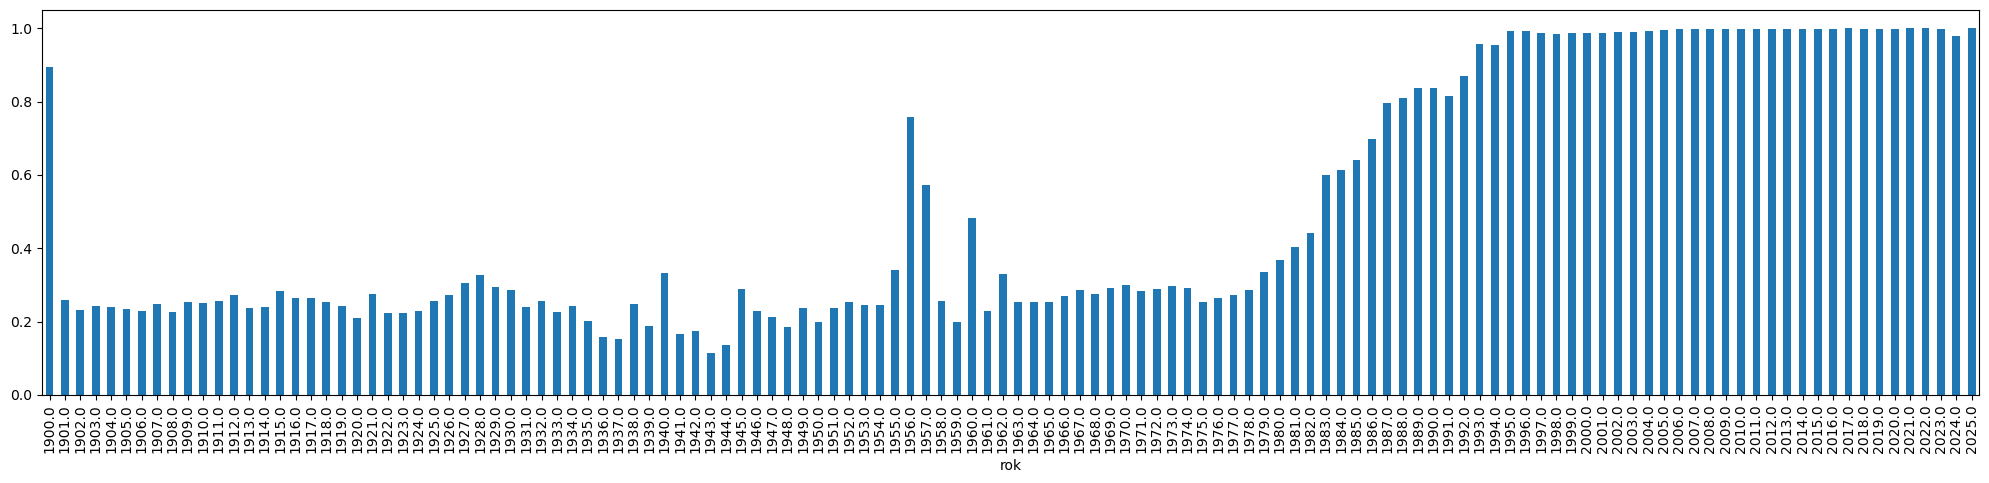

In [27]:
(df[df['655_a'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [29]:
kategorie = df.explode('655_a').groupby('655_a').size()

In [87]:
kategorie.nlargest(150)

655_a
příručky                              60429
učebnice vysokých škol                47362
publikace pro děti                    42091
handbooks and manuals                 35031
children's literature                 33004
studie                                24458
monografie                            23841
textbooks (higher)                    21286
sborníky                              19232
monographs                            19157
populárně-naučné publikace            18079
česká poezie                          16358
české romány                          15763
americké romány                       15535
popular works                         15094
informační publikace                  15034
American fiction                      14811
Czech poetry                          12780
sborníky konferencí                   12656
Czech fiction                         12355
studies                               11203
fotografické publikace                10667
přehledy                  

In [129]:
[x for x in kategorie.index.to_list() if "dvojj" in x]

['dvojjazyčná vydání', 'dvojjazyčné překladové slovníky']

In [111]:
travel = [x for x in kategorie.index.to_list() if ("travel" in x) or ("cesto" in x)]

In [65]:
naucne = ['příručky','učebnice vysokých škol','handbooks and manuals','studie','textbooks (higher)','sborníky','populárně-naučné publikace','informační publikace','sborníky konferencí','studies','přehledy','metodické příručky','učebnice středních škol','essays','proceedings of conferences','pracovní sešity','učebnice základních škol','kuchařské recepty','katalogy výstav','activity books','surveys','pojednání','jubilejní publikace','úvahy','učebnice','učební texty','literatura faktu','výbory','průvodce','exhibition catalogs','textbooks (elementary)','non-fiction','educational texts','rozhovory','eseje','turistické průvodce','katalogy','praktická cvičení']

In [59]:
df2 = df.explode('655_a')

In [146]:
rozdily = []
for x in kategorie.nlargest(1000).index.to_list():
    rozdil = {}
    rozdil['kategorie'] = x
    try:
        rozdil['rozdil'] = len(df2[(df2['655_a'] == x) & (df2['rok'].isin([2024,2023,2022,2021,2020]))]) / len(df2[(df2['655_a'] == x) & (df2['rok'].isin([2004,2003,2002,2001,2000]))])
    except:
        pass
    rozdily.append(rozdil)

In [ ]:
pd.DataFrame(rozdily).sort_values(by="rozdil")

<Axes: xlabel='rok'>

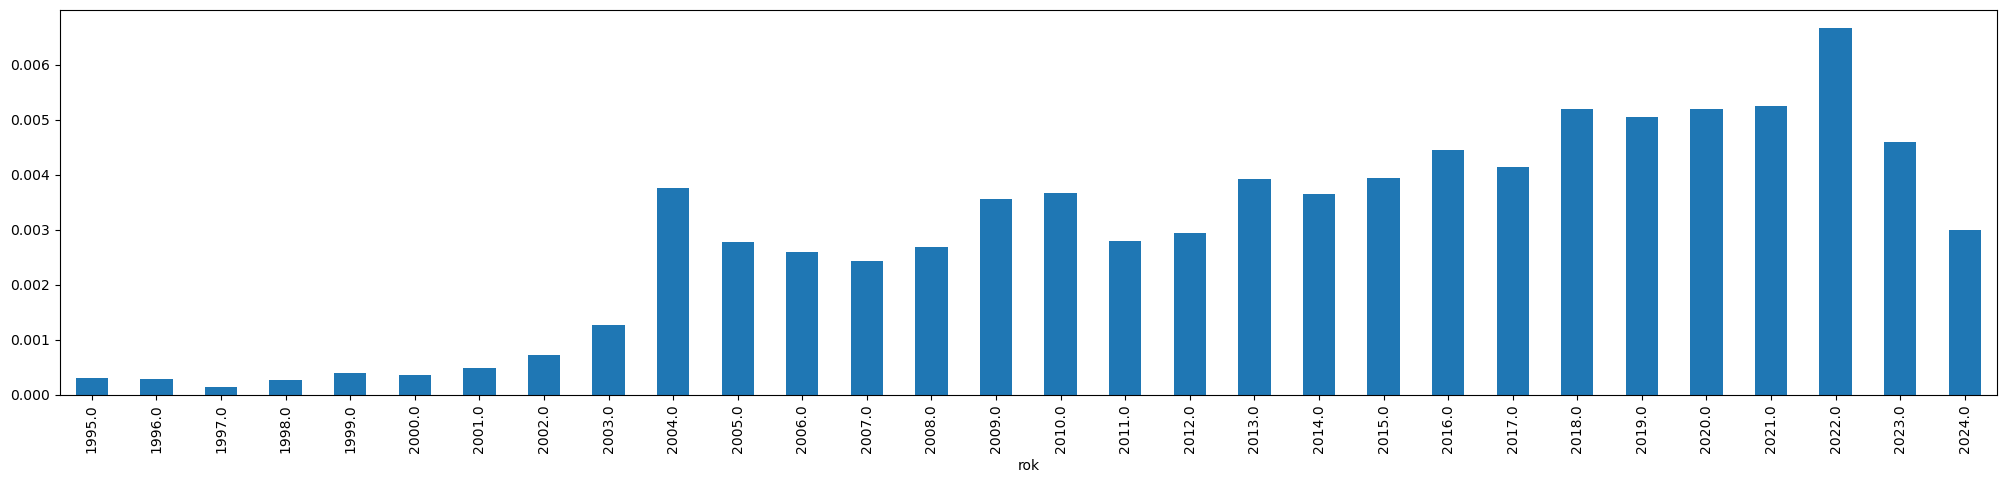

In [131]:
(df2[df2['655_a'] == 'dvojjazyčná vydání'].groupby('rok')['008'].nunique() / df2.groupby('rok')['008'].nunique()).tail(31).head(30).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

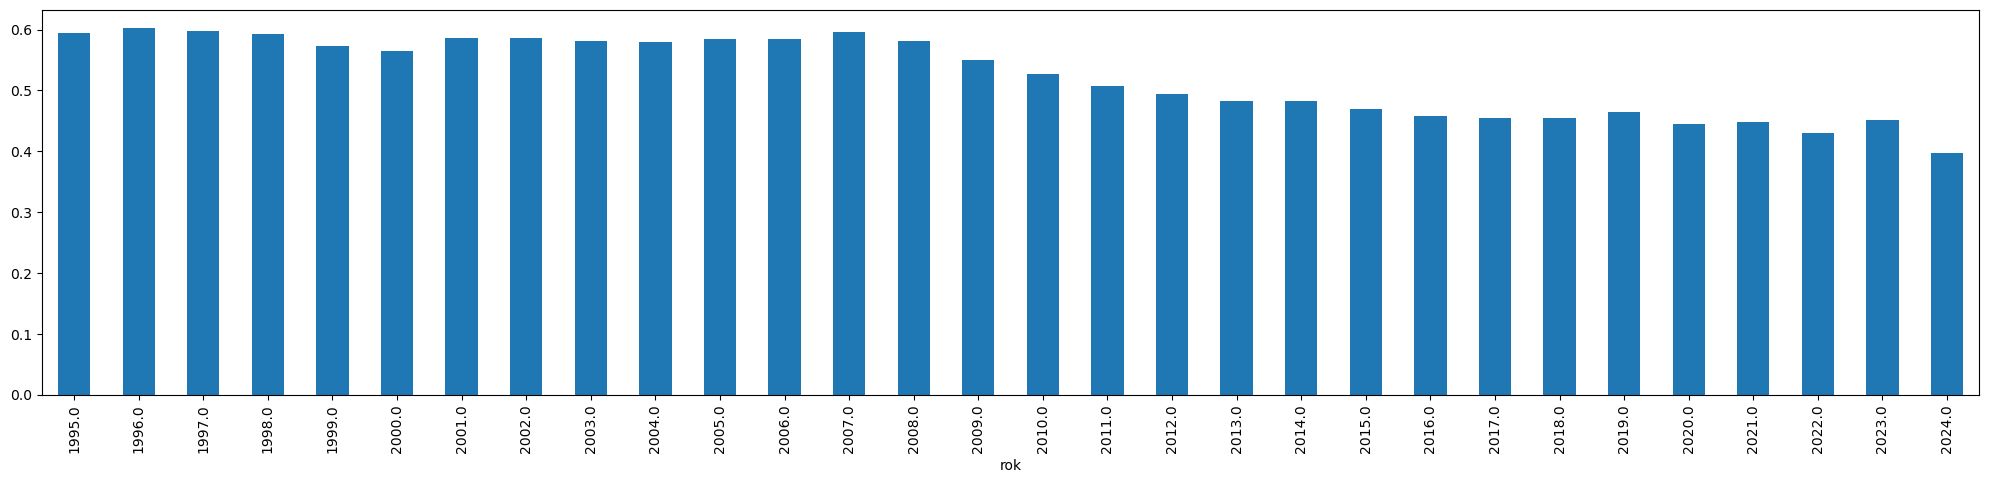

In [77]:
(df2[df2['655_a'].isin(naucne)].groupby('rok')['008'].nunique() / df2.groupby('rok')['008'].nunique()).tail(31).head(30).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

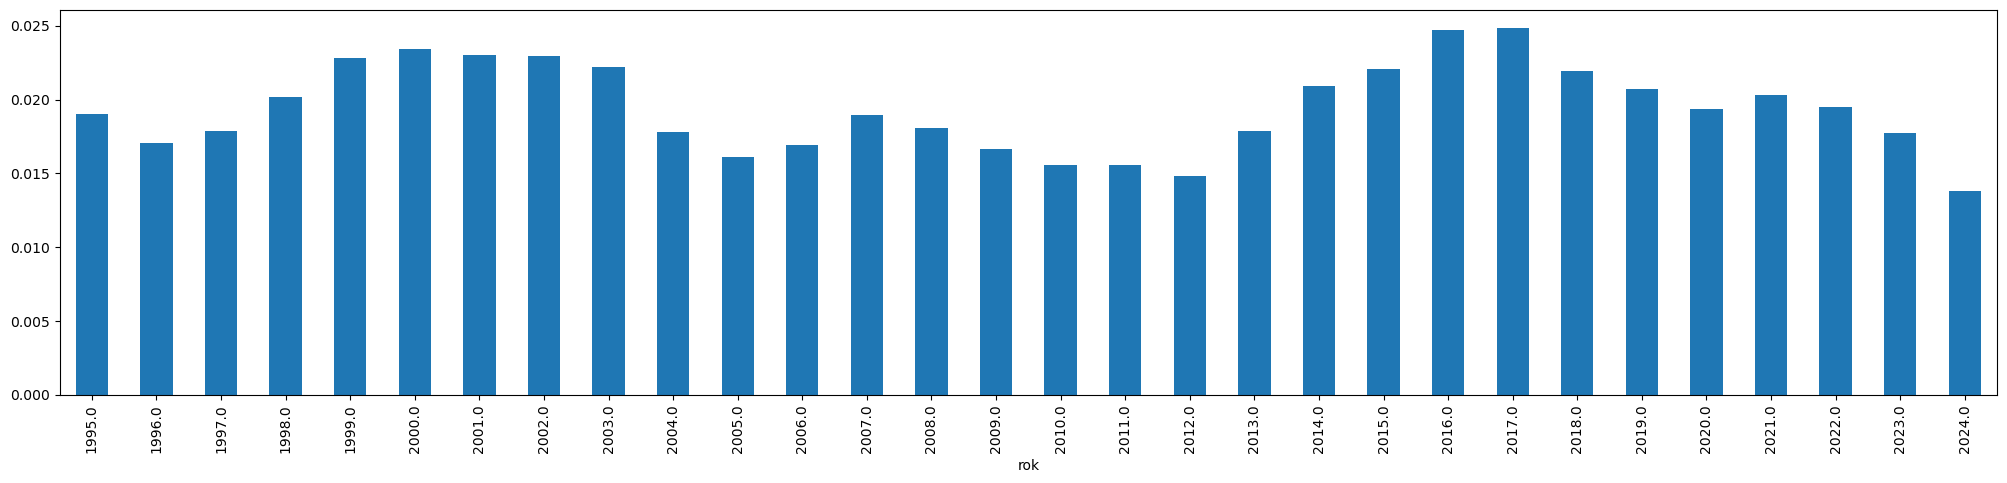

In [91]:
(df2[df2['655_a'].isin(['kuchařské recepty','cookbooks'])].groupby('rok')['008'].nunique() / df2[df2['655_a'].notnull()].groupby('rok')['008'].nunique()).tail(31).head(30).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

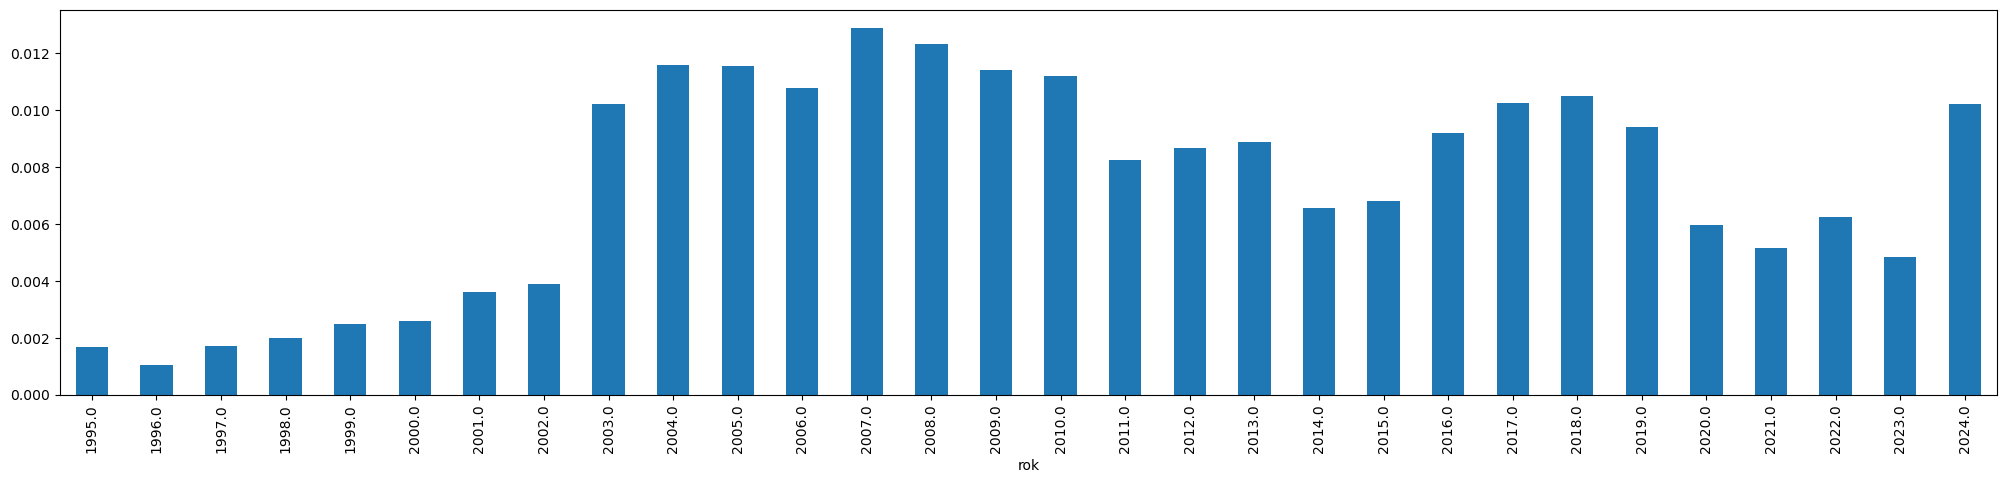

In [95]:
(df2[df2['655_a'].isin(['turistické průvodce','tourist guidebooks'])].groupby('rok')['008'].nunique() / df2[df2['655_a'].notnull()].groupby('rok')['008'].nunique()).tail(31).head(30).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

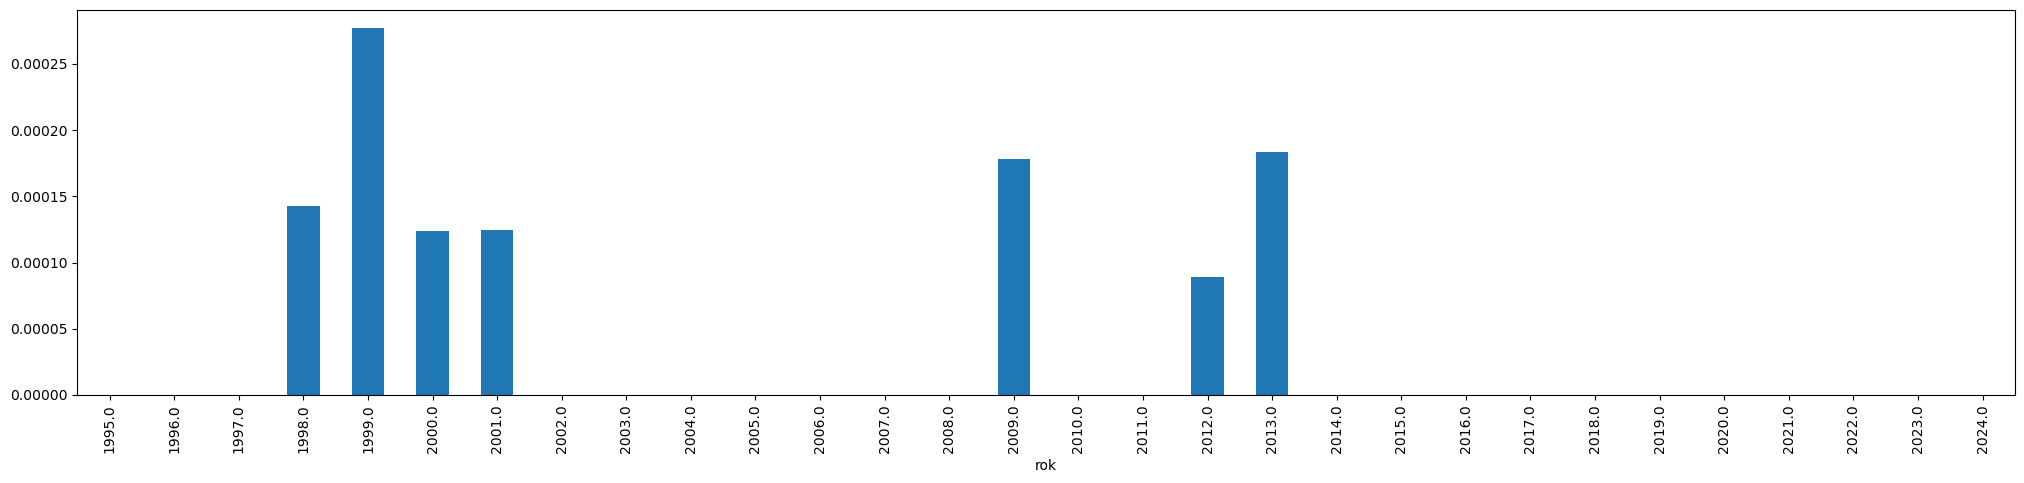

In [99]:
(df2[df2['655_a'].isin(['tourist maps','turistické mapy'])].groupby('rok')['008'].nunique() / df2[df2['655_a'].notnull()].groupby('rok')['008'].nunique()).tail(31).head(30).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

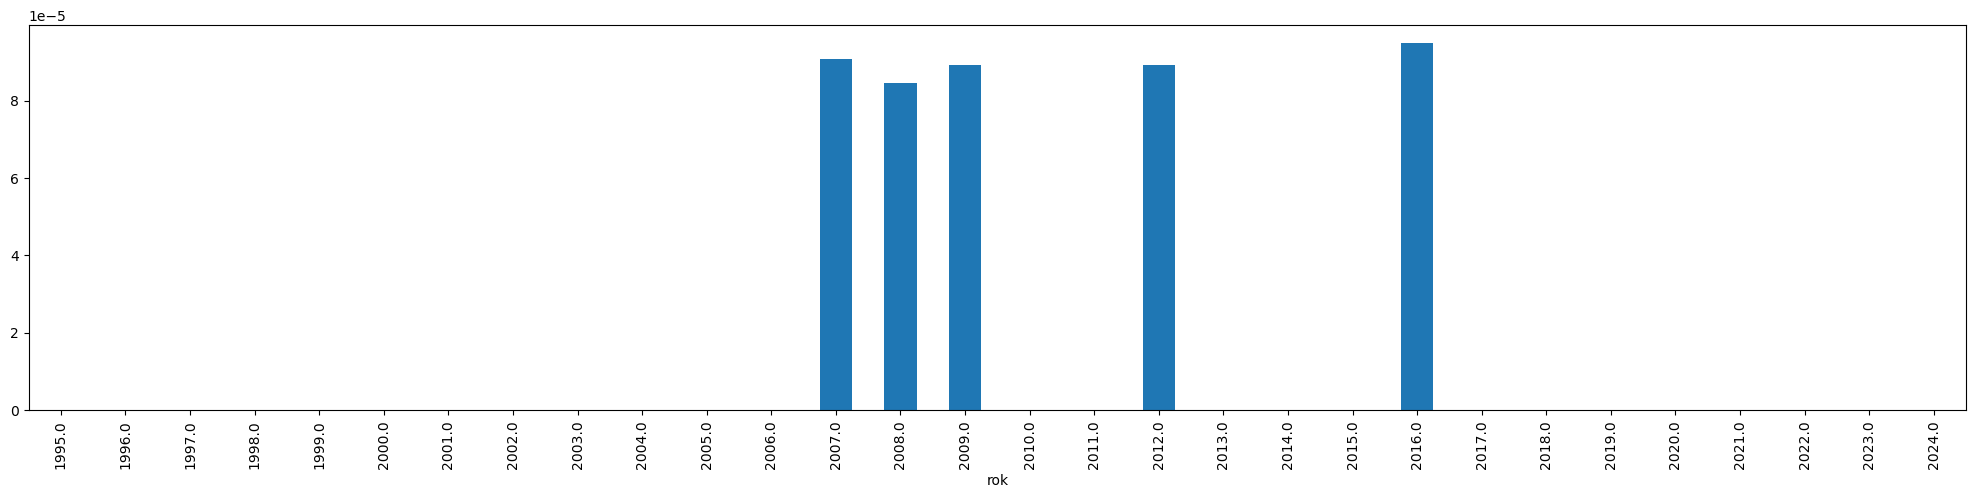

In [101]:
(df2[df2['655_a'].isin(['cykloturistické mapy'])].groupby('rok')['008'].nunique() / df2[df2['655_a'].notnull()].groupby('rok')['008'].nunique()).tail(31).head(30).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

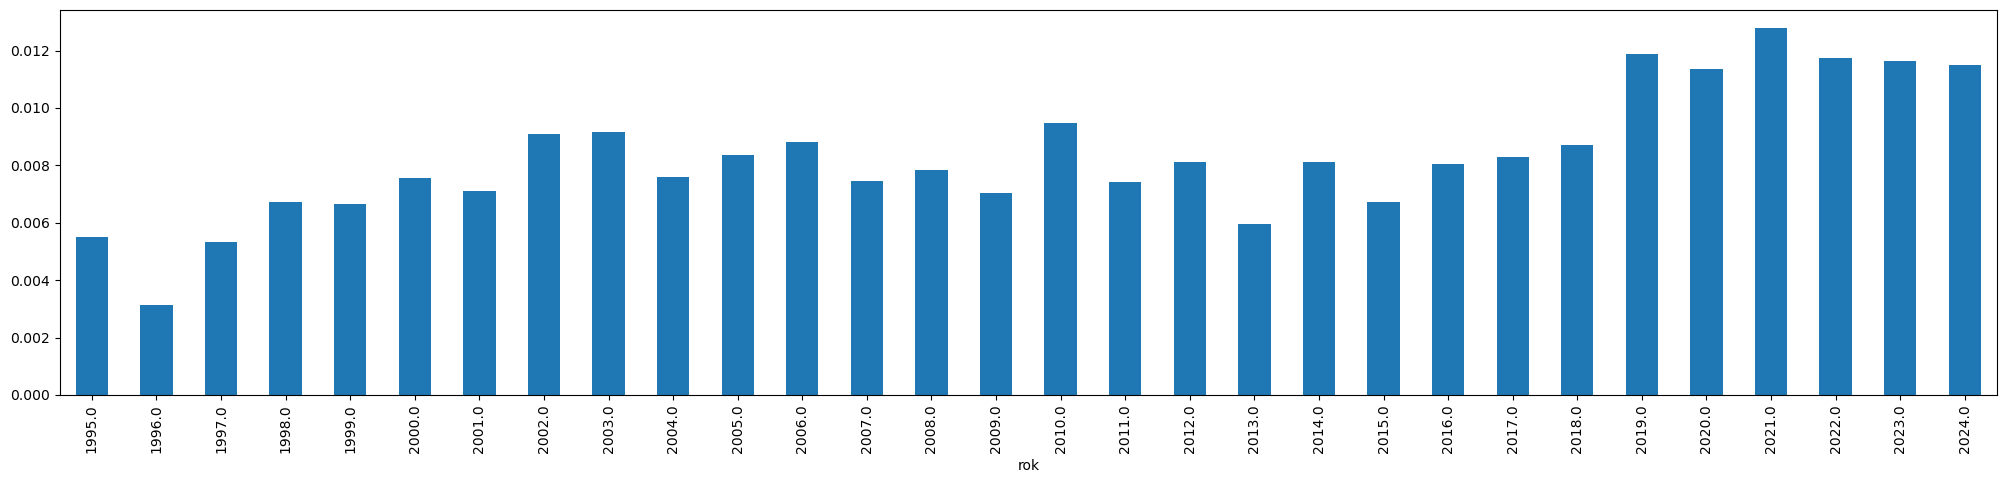

In [113]:
(df2[df2['655_a'].isin(travel)].groupby('rok')['008'].nunique() / df2[df2['655_a'].notnull()].groupby('rok')['008'].nunique()).tail(31).head(30).plot.bar(figsize=(25,5))

In [81]:
df2[df2['655_a'] == 'průvodce'].sample(15)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,655_7
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20172937975,170928s2017 xr a g f 000 0 cze,"[978-80-7398-390-1, 978-80-7449-493-2]",None,"[(Fantom Print ;, vázáno), (Crew ;, vázáno)]",[cze],[eng],1,None,[82-1/-8],[Literatura různých forem a žánrů (o ní)],"[821.162.1-32, 82-322.9, 794:004.9, 794.4, 82-...",None,None,None,None,None,Gwent :,překlad Filip Ženíšek,None,None,None,[První vydání v českém jazyce],None,None,None,None,None,None,None,[[Praha] :],[Crew s.r.o. ve spolupráci s nakladatelstvím F...,[2017],[1],[247 stran :],[barevné ilustrace ;],[32 cm],[Světové komiksy česky],None,[Přeloženo z angličtiny],None,None,None,None,[20.-21. století],"[polská povídka, fantasy povídka, počítačové h...",None,"[20.-21. století, 20.-21. století, None, None,...",None,None,None,průvodce,[trl],[xx0217840],"[Ženíšek, Filip]",None,None,None,None,None,[Světové komiksy česky],[Fantom Print],None,nam a22 i 4500,2017.0,"[fd133154, fd132947, None, None]"
cpk19960148627,970109s1996 xr ab e 001 0 cze,[80-901866-9-6],None,[(brož.)],None,None,None,None,[913(437)],"[Geografie Česka a Slovenska, reálie, cestování]",[908.437.1],None,None,None,None,None,Český ráj - Jičínsko /,"[autoři Petr David, Vladimír Soukup ... et al.]",None,None,None,[1. vyd.],None,[Praha :],"[S & D,]",[1996],None,None,None,None,None,None,None,[154 s. :],"[il., mapky ;]",[20 cm],"[Průvodce po Čechách, Moravě, Slezsku ;]",[sv. 10],[Kresby Hana Davidová a Martin David],None,None,None,None,None,None,None,None,None,"[Český ráj (Česko), Jičín (Česko : oblast)]",None,průvodce,"[aut, aut]","[xx0006793, xx0006786]","[Soukup, Vladimír,, David, Petr,]","[1949-, 1949-]",None,None,None,None,"[Průvodce po Čechách, Moravě, Slezsku]",None,None,nam a22 a 4500,1996.0,[fd133154]
nkc20142569914,140303s2013 xr aei g f 000 0 cze,[978-80-87712-97-9],None,[(brož.)],None,None,None,None,[72],[Architektura],"[728.81, 728.82, (437.325), (036)]","[aut, pht]",mzk2007417642,"Michálek, Ladislav",None,None,Plumlov :,[zpracoval Ladislav Michálek ; rekonstrukcemi ...,None,None,None,[1. vyd.],None,[Hukvaldy-Dobrá :],"[Putujme,]",[2013],None,None,None,None,None,None,None,[43 s. :],"[il., plány, erby ;]",[21 cm],[Putujme po hradech a zámcích ;],[sv. 66],"[Název z obálky, Nad názvem zeměpisné souřadni...",None,None,None,None,None,"[hrady, zámky, castles, chateaux]",None,None,"[Česko, Česko, Czechia, Czechia]","[Plumlov (Česko), Plumlov (Czechia)]",None,průvodce,[ill],[mzk2003186017],"[Vojkovský, Rostislav,]",[1953-],None,None,None,None,[Putujme po hradech a zámcích],None,None,nam a22 a 4500,2013.0,"[fd133154, None]"
nkc20142627493,140930s2014 xr acehe c 000 0 cze,[978-80-260-7031-3],None,[(brož.)],None,None,None,None,[7.01/.09],[Umění],"[72.034.7, 7.032/038:27, 069.5, 94(437.314), (...",[aut],mzk2015858652,"Koudelka, Petr",None,None,Barokní komplex Křenov ;,"Petr Koudelka, [Jiří Šmeral]",None,None,None,[1. vyd.],None,[[Křenov] :],"[Museum fara Křenov,]",[2014],None,None,None,None,None,None,None,[184 s. :],"[il. (převážně barev.), portréty, 1 plán, faks...",[30 cm],None,None,[500 výt.],None,None,None,None,"[18.-19. století, 14.-20. století]","[barokní architektura, křesťanské umění, muzej...",None,"[None, 18.-19. století, None, None, 18th-19th ...","[Česko, None, Česko, Czechia, None, Czechia]","[Křenov (Svitavy, Česko), Křenov (Svitavy, Cze...",None,průvodce,[aut],[mzk2004261389],"[Šmeral, Jiří,]",[1973-],None,[ko2015861187],"[Museum fara Křenov (Křenov, Svitavy, Česko)]",None,None,None,None,nam a22 a 4500,2014.0,"[fd133154, None]"
nkc20213342786,210709s1956 xr ab e 000 0 cze,None,"[Kčs 1,00]",[(Brožováno) 

<Axes: xlabel='655_a'>

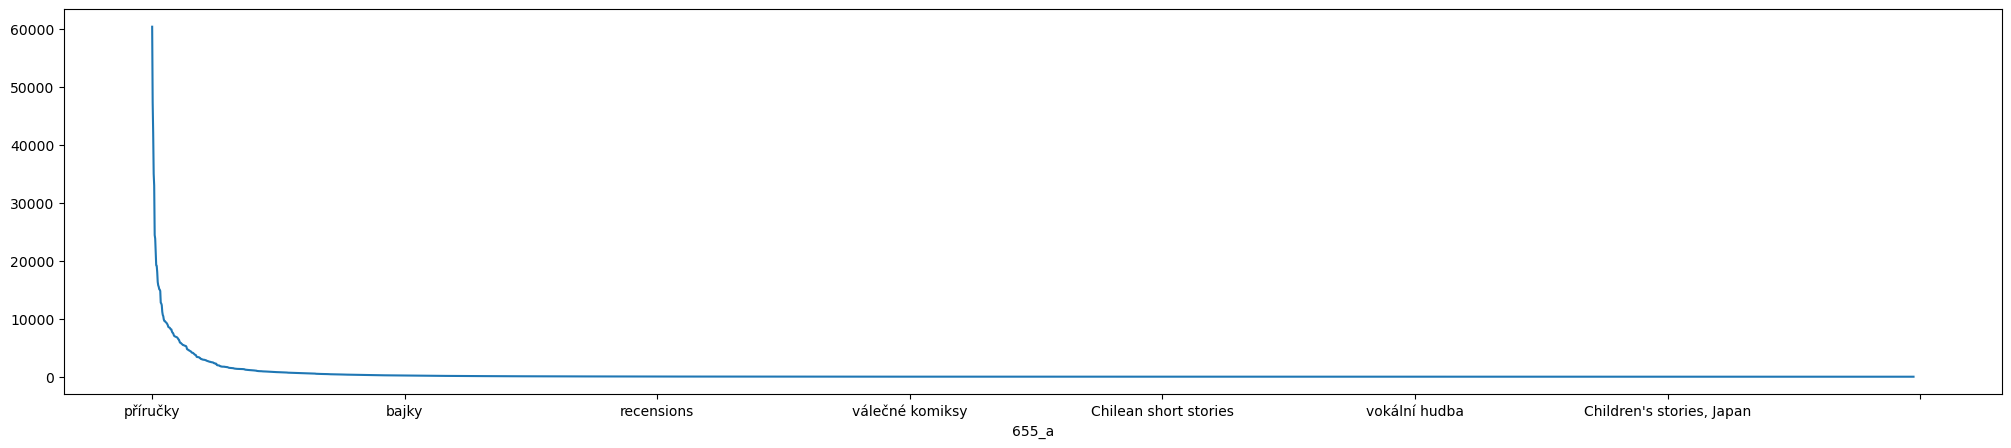

In [41]:
kategorie.sort_values(ascending=False).plot(figsize=(25,5))

In [53]:
len(kategorie[kategorie >= 10000])

23

In [51]:
len(kategorie[kategorie >= 1000])

208

In [49]:
len(kategorie[kategorie >= 200])

510

In [47]:
len(kategorie[kategorie >= 100])

666

In [45]:
len(kategorie)

3488